In [1]:
import pandas as pd
import numpy as np


In [10]:
wine = pd.read_csv('/winequality-white.xls', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_wine


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [12]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:

scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:

my_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(56,activation='relu'),
  tf.keras.layers.Dropout(0.30),
  tf.keras.layers.Dense(56,activation='relu'),
  tf.keras.layers.Dropout(0.20),
  tf.keras.layers.Dense(15,activation='softmax'),
])

In [15]:
optimiser = tf.keras.optimizers.Adam()
my_model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:

X_train.shape

(3918, 11)

In [17]:

history = my_model.fit(X_train, y_train,validation_split=0.20, epochs=100, batch_size=12)

Epoch 1/100
262/262 [==============================] - 1s 2ms/step - loss: 1.4976 - accuracy: 0.4400 - val_loss: 1.1829 - val_accuracy: 0.5077
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 1.2198 - accuracy: 0.4837 - val_loss: 1.1513 - val_accuracy: 0.5191
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 1.1854 - accuracy: 0.4994 - val_loss: 1.1219 - val_accuracy: 0.5395
Epoch 4/100
262/262 [==============================] - 0s 2ms/step - loss: 1.1651 - accuracy: 0.5083 - val_loss: 1.1165 - val_accuracy: 0.5217
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 1.1444 - accuracy: 0.5182 - val_loss: 1.1054 - val_accuracy: 0.5268
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 1.1390 - accuracy: 0.5140 - val_loss: 1.0942 - val_accuracy: 0.5344
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 1.1251 - accuracy: 0.5297 - val_loss: 1.0901 - val_accuracy: 0.5293

In [18]:
my_model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 879us/step - loss: 1.2347 - accuracy: 0.4959


[1.2346607446670532, 0.4959183633327484]

In [19]:
my_predict = my_model.predict(X_test)
my_predict

array([[4.0378419e-11, 2.5983441e-11, 2.9417330e-11, ..., 5.6791065e-11,
        2.7984788e-11, 4.0396752e-11],
       [2.5537395e-11, 1.7211638e-11, 2.1476113e-11, ..., 3.0776433e-11,
        2.1609697e-11, 2.5811674e-11],
       [6.8659163e-18, 2.7808516e-18, 4.3343946e-18, ..., 1.4853522e-17,
        4.2237765e-18, 8.8441034e-18],
       ...,
       [8.8820807e-16, 3.6117850e-16, 5.7414879e-16, ..., 1.6552311e-15,
        5.6991982e-16, 9.0635543e-16],
       [6.6710917e-15, 3.5528022e-15, 4.8098304e-15, ..., 7.3648151e-15,
        5.6165510e-15, 6.5296703e-15],
       [3.7084016e-18, 1.9039400e-18, 4.0969110e-18, ..., 4.8525976e-18,
        4.7468103e-18, 5.4515533e-18]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


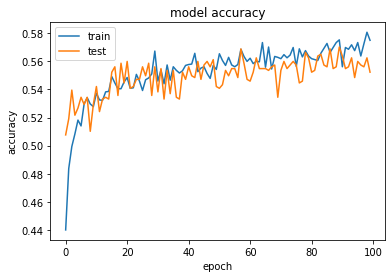

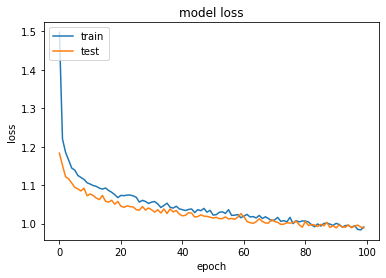

In [20]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
np.round(my_predict)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)